In [1]:
!pip install torcheeg torch numpy matplotlib scipy seaborn pandas -q


^C


In [8]:
import numpy as np
from torcheeg.datasets import SEEDDataset
from torcheeg import transforms
from torcheeg.datasets.constants import SEED_CHANNEL_LOCATION_DICT

# Load the dataset
dataset = SEEDDataset(
    root_path='D:/FAST/EEG/Preprocessed_EEG',
    io_path = 'D:/FYP-II/EEg-based-Emotion-Recognition/FYP_2/Haseeb/.torcheeg/datasets_1747078356366_RtGOr',
    offline_transform=transforms.Compose([
        transforms.BandDifferentialEntropy(),
        transforms.ToGrid(SEED_CHANNEL_LOCATION_DICT)
    ]),
    online_transform=None,
    label_transform=transforms.Compose([
        transforms.Select('emotion'),
        transforms.Lambda(lambda x: x + 1)  # Shift labels to 1-based indexing
    ]),
    num_worker=4
)


[2025-05-13 13:03:26] INFO (torcheeg/MainThread) 🔍 | Detected cached processing results, reading cache from D:/FYP-II/EEg-based-Emotion-Recognition/FYP_2/Haseeb/.torcheeg/datasets_1747078356366_RtGOr.


In [3]:
data, labels = dataset[0]  # Example to access the first sample
print("EEG features shape:", data.shape)  # Should be [4, 9, 9]

EEG features shape: (4, 9, 9)


In [4]:
# Initialize lists
eeg_features = []
labels = []

# Iterate through dataset
for i in range(len(dataset)):
    eeg, label = dataset[i]  # Each is a torch.Tensor or int
    eeg_features.append(eeg)       # shape: [4, 9, 9]
    labels.append(label)

# Convert to NumPy arrays
eeg_features = np.stack(eeg_features)             # shape: [num_samples, 4, 9, 9]
labels = np.array(labels)                         # shape: [num_samples]

# Save to .npy files
np.save('eeg_de_features.npy', eeg_features)
np.save('labels.npy', labels)

print("Saved DE features and labels to .npy files.")

Saved DE features and labels to .npy files.


## t-SNE visualization

In [5]:
from sklearn.manifold import TSNE

eeg_features_flat = eeg_features.reshape(eeg_features.shape[0], -1)  # shape: [N, 324]


# Initialize and fit t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
eeg_tsne = tsne.fit_transform(eeg_features_flat)  # shape: [N, 2]


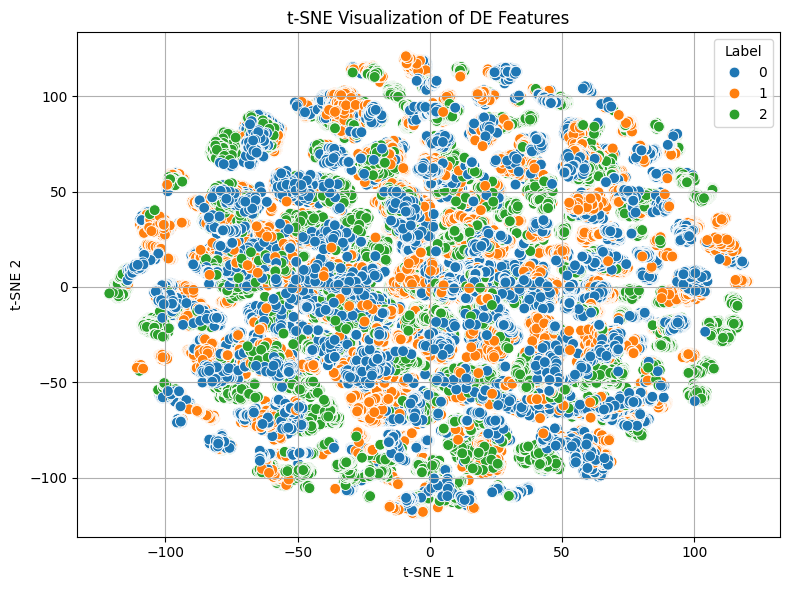

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=eeg_tsne[:, 0], y=eeg_tsne[:, 1], hue=labels, palette='tab10', s=60)
plt.title("t-SNE Visualization of DE Features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Label")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('tSNE_visualization_npy.png', dpi=300)

## t-SNE visualization through .npy

In [7]:
import numpy as np

# Load saved features and labels
eeg_features = np.load('eeg_de_features.npy')   # shape: [N, 4, 9, 9]
labels = np.load('labels.npy')                  # shape: [N]


In [9]:
import numpy as np

# Initialize lists
eeg_features = []
labels = []

# Iterate through dataset
for i in range(len(dataset)):
    eeg, label = dataset[i]  # eeg: torch.Tensor or np.ndarray of shape [4, 9, 9]
    
    # Ensure it's a NumPy array
    eeg_np = eeg.numpy() if hasattr(eeg, 'numpy') else eeg
    eeg_features.append(eeg_np.flatten())  # Flatten [4, 9, 9] to [324]
    labels.append(label)

# Convert to NumPy arrays
eeg_features = np.array(eeg_features)  # shape: [N, 324]
labels = np.array(labels)              # shape: [N]


In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
eeg_tsne = tsne.fit_transform(eeg_features)  # shape: [N, 2]


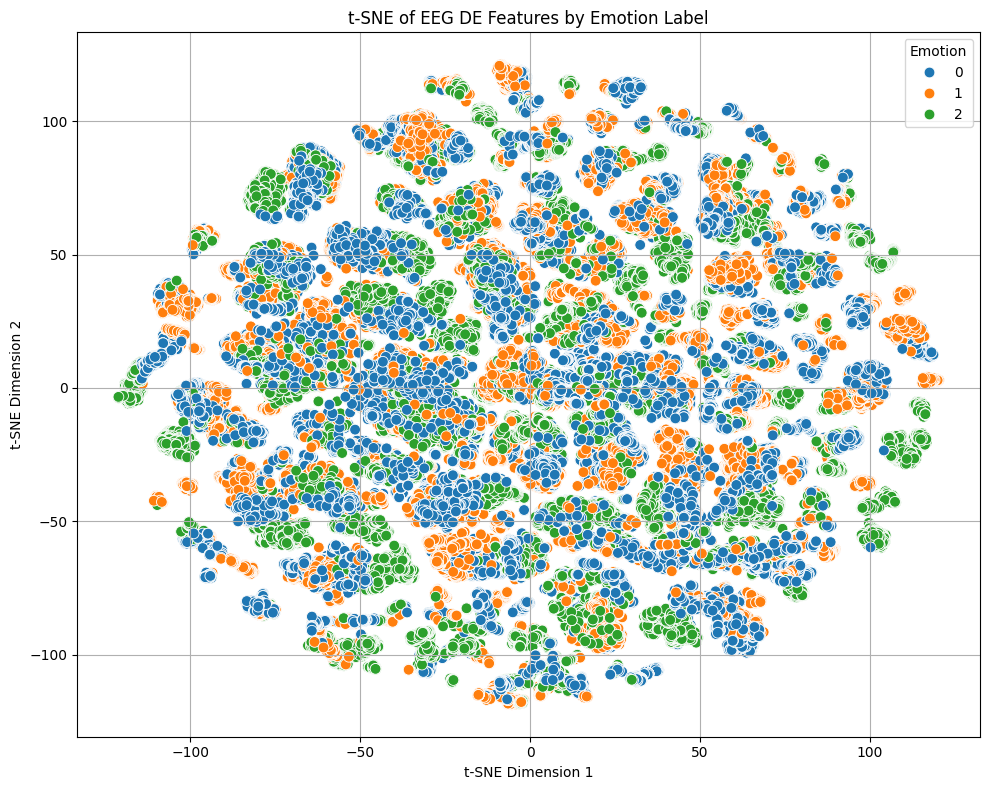

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=eeg_tsne[:, 0], y=eeg_tsne[:, 1], hue=labels, palette='tab10', s=60)
plt.title("t-SNE of EEG DE Features by Emotion Label")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Emotion")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('tsne_plot.png', dpi=300)